In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import normaltest, kstest, norm
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


from acquire import wrangle_zillow, train_validate, check_p_val, explore_relationships

In [2]:
#Sets options to show more stuff
pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None
pd.options.display.max_rows = 200

In [3]:
df = wrangle_zillow()

In [4]:
df.head()

,tax_value,bedrooms,bathrooms,sqft,transactiondate,hottub_spa,deck,garagecarcnt,pool,County,latitude,longitude,sqft_bins,value_bins,has_garages,num_of_features
0,1023282.0,4.0,3.5,3100.0,2017-01-01,0,0,2.0,0,Orange,3.363493,-1.178692,3200,$1.2m,1,1
1,464000.0,2.0,1.0,1465.0,2017-01-01,0,0,1.0,0,Ventura,3.444927,-1.192815,1600,$800k,1,1
2,564778.0,3.0,2.0,1243.0,2017-01-01,0,0,2.0,1,Orange,3.388617,-1.178232,1400,$800k,1,2
3,145143.0,4.0,3.0,2376.0,2017-01-01,0,0,0.0,1,Los Angeles,3.424518,-1.182407,2400,$400k,0,1
4,773303.0,4.0,3.0,2962.0,2017-01-01,0,0,0.0,1,Los Angeles,3.414520,-1.181798,3000,$800k,0,1


In [5]:
random_seed = 1969
alpha = 0.05

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50696 entries, 0 to 50695
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tax_value        50696 non-null  float64       
 1   bedrooms         50696 non-null  float64       
 2   bathrooms        50696 non-null  float64       
 3   sqft             50696 non-null  float64       
 4   transactiondate  50696 non-null  datetime64[ns]
 5   hottub_spa       50696 non-null  int64         
 6   deck             50696 non-null  int64         
 7   garagecarcnt     50696 non-null  float64       
 8   pool             50696 non-null  int64         
 9   County           50696 non-null  object        
 10  latitude         50696 non-null  float64       
 11  longitude        50696 non-null  float64       
 12  sqft_bins        50696 non-null  int64         
 13  value_bins       50696 non-null  object        
 14  has_garages      50696 non-null  int64

In [9]:
train, val, test = train_validate(df)

In [10]:
feature_list = ['bedrooms']
target_col = 'tax_value'

In [11]:
metrics = []
num_items = train['bedrooms'].unique()
num_items.sort()
for item in num_items:
    temp_df = train[train['bedrooms'] == item]['tax_value'].describe()
    temp_metrics = {
        'comparison' : f'{item}',
        'count' : round(temp_df[0],0),
        'mean' : round(temp_df[1],0),
        'std' : round(temp_df[2],0),
        'min' : round(temp_df[3],0),
        '25%' : round(temp_df[4],0),
        '50%' : round(temp_df[5],0),
        '75%' : round(temp_df[6],0),
        'max' : round(temp_df[7],0)}
    metrics.append(temp_metrics)

bedrooms_df = pd.DataFrame(metrics)

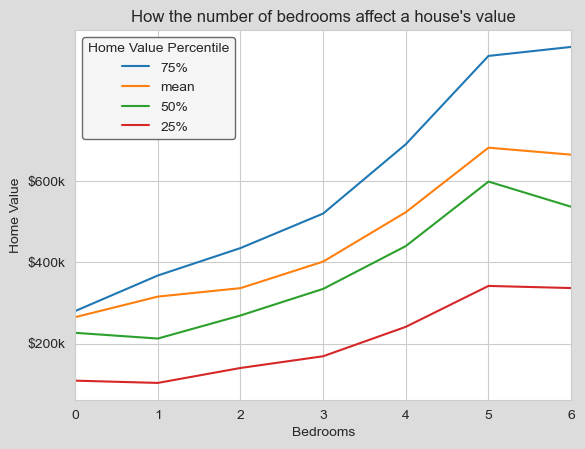

In [30]:
fig, ax = plt.subplots(facecolor='gainsboro', edgecolor='dimgray')
sns.set_style('whitegrid', rc={'figure.facecolor':'gainsboro'})
sns.lineplot(ax=ax, data=bedrooms_df, x='comparison', y='75%', label = '75%').set(title="How the number of bedrooms affect a house's value")
sns.lineplot(ax=ax, data=bedrooms_df, x='comparison', y='mean', label = 'mean')
sns.lineplot(ax=ax, data=bedrooms_df, x='comparison', y='50%' , label = '50%')
sns.lineplot(ax=ax, data=bedrooms_df, x='comparison', y='25%', label = '25%')
plt.xlim(left=0, right =3)
plt.ylabel('Home Value')
plt.xlabel('Bedrooms')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['0', '1', '2', '3', '4', '5', '6'])
plt.yticks([200000,400000,600000],['$200k','$400k','$600k'])
plt.legend(title="Home Value Percentile", framealpha=1, facecolor="whitesmoke", edgecolor='dimgray')
plt.show()

In [13]:
metrics = []
num_items = train['bathrooms'].unique()
num_items.sort()
for item in num_items:
    temp_df = train[train['bathrooms'] == item]['tax_value'].describe()
    temp_metrics = {
        'comparison' : f'{item}',
        'count' : round(temp_df[0],0),
        'mean' : round(temp_df[1],0),
        'std' : round(temp_df[2],0),
        'min' : round(temp_df[3],0),
        '25%' : round(temp_df[4],0),
        '50%' : round(temp_df[5],0),
        '75%' : round(temp_df[6],0),
        'max' : round(temp_df[7],0)}
    metrics.append(temp_metrics)

bathrooms_df = pd.DataFrame(metrics)

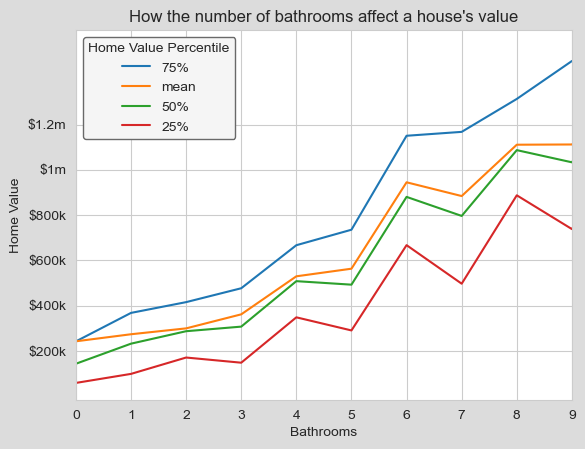

In [32]:
fig, ax = plt.subplots(facecolor='gainsboro', edgecolor='dimgray')
sns.set_style('whitegrid', rc={'figure.facecolor':'gainsboro'})
sns.lineplot(ax=ax, data=bathrooms_df, x='comparison', y='75%', label = '75%').set(title="How the number of bathrooms affect a house's value")
sns.lineplot(ax=ax, data=bathrooms_df, x='comparison', y='mean', label = 'mean')
sns.lineplot(ax=ax, data=bathrooms_df, x='comparison', y='50%' , label = '50%')
sns.lineplot(ax=ax, data=bathrooms_df, x='comparison', y='25%', label = '25%')
plt.xlim(left=0, right =3)
plt.ylabel('Home Value')
plt.xlabel('Bathrooms')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.yticks([200000, 400000, 600000, 800000, 1000000, 1200000, ],['$200k','$400k','$600k','$800k','$1m','$1.2m'])
plt.legend(title="Home Value Percentile", framealpha=1, facecolor="whitesmoke", edgecolor='dimgray')
plt.show()

<Figure size 1200x1200 with 0 Axes>

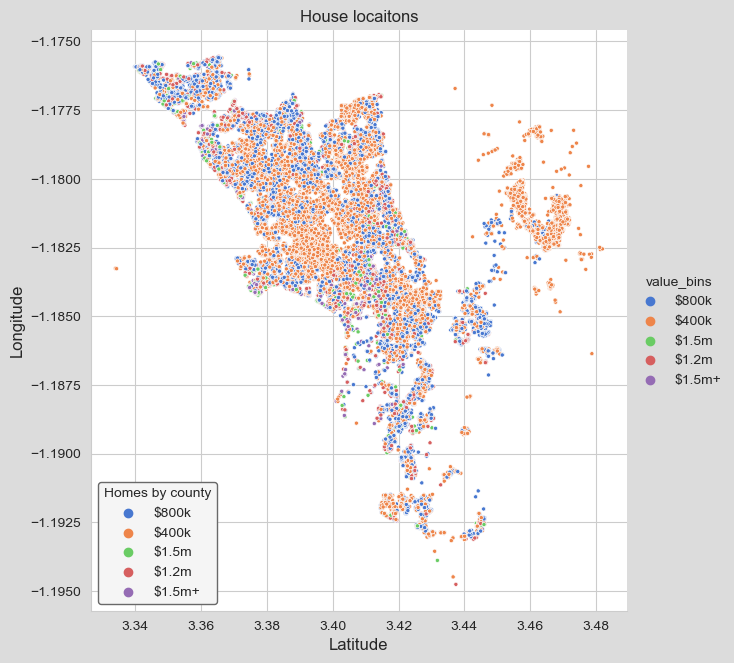

In [15]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid', rc={'figure.facecolor':'gainsboro'})
fig = sns.relplot(data = train, x='latitude', y='longitude', height=6.5, hue='value_bins', marker='.', palette='muted')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.title("House locaitons")
plt.legend(title="Homes by county", framealpha=1, facecolor="whitesmoke", edgecolor='dimgray')
plt.show()